# Proyek Analisis Data: Nama dataset
- Nama: Mochammad Daffa Putra Karyudi
- Email: M.Daffa.Karyudi@gmail.com
- Id Dicoding: daffakaryudi

## Menentukan Pertanyaan Bisnis

1. Apakah ada perbedaan signifikan antara penjualan barang yang telah dikonfirmasi dengan barang yang belum dikonfirmasi? 

2. Bagaimana penggunaan kartu kredit di daerah dengan penjualan terbanyak dibandingkan dengan jenis pembayaran lainnya?

3. Apakah distribusi hasil penjualan dari daerah penjual dengan dengan daerah pelanggan yang membeli berbeda secara signifikan dari distribusi normal?

4. Bagaimana pengaruh daerah seller dengan daerah customer ?

5. Bagaimana tren penjualan untuk kategori produk dengan penjualan diatas 300?

6. Dimanakah lokasi geografis dari tiap customer yang mendaftar ?

## Menyaipkan semua library yang dibuthkan

In [1]:
# Import library pandas untuk manipulasi dan analisis data tabular
import pandas as pd 

# Import library numpy untuk operasi numerik
import numpy as np

# Import library matplotlib.pyplot untuk membuat visualisasi data, seperti grafik
import matplotlib.pyplot as plt

# Import class ConnectionPatch dari matplotlib.patches 
# Digunakan untuk menghubungkan dua titik dalam plot dengan panah atau garis
from matplotlib.patches import ConnectionPatch

# Import fungsi shapiro dari library scipy.stats untuk melakukan uji normalitas data
from scipy.stats import shapiro

# Import library seaborn untuk membuat visualisasi data statistik yang lebih menarik dan informatif
import seaborn as sns

# Import class Basemap dari mpl_toolkits.basemap untuk membuat peta dasar dengan proyeksi tertentu
from mpl_toolkits.basemap import Basemap

## Data Wrangling

### Gathering Data

In [2]:
# Customer
customer = pd.read_csv("./dataset/customers_dataset.csv")
geolocation = pd.read_csv("./dataset/geolocation_dataset.csv")

# Transaksi
order_payments = pd.read_csv("./dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("./dataset/order_reviews_dataset.csv")
order_items = pd.read_csv("./dataset/order_items_dataset.csv")
order_dataset = pd.read_csv("./dataset/orders_dataset.csv")

# Perusahaan
product_category = pd.read_csv("./dataset/product_category_name_translation.csv")
product_dataset = pd.read_csv("./dataset/products_dataset.csv")
sellers_dataset = pd.read_csv("./dataset/sellers_dataset.csv") 

### Assessing Data

In [3]:
# Persiapan Function
def prepare_data(df):
	print(df.info(), "\n"+("_")*50)
	print("Data Describe: \n", df.describe(include='all'), "\n"+("_")*50+"\n Data null:\n", df.isna().sum(), "\n"+("_")*50+"\n duplicated data: ", df.duplicated().sum())

In [4]:
prepare_data(customer)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 
__________________________________________________


Data Describe: 
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_city

In [5]:
prepare_data(geolocation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None 
__________________________________________________
Data Describe: 
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN    

In [6]:
prepare_data(order_items)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None 
__________________________________________________
Data Describe: 
                                 order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   


In [7]:
prepare_data(order_payments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None 
__________________________________________________


Data Describe: 
                                 order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count       

**order_payments** terjadi duplicated pada order_id dikarenakan adanya pembayaran lebih dari 2 kali dengan metode pembyaran yang berbeda atau sama

In [8]:
print("Duplicated data dari order_payments berdasarkan order_id: " + str(order_payments.duplicated(subset=["order_id"]).sum()))

Duplicated data dari order_payments berdasarkan order_id: 4446


In [9]:
prepare_data(order_reviews)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None 
__________________________________________________


Data Describe: 
                                review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_title revi

In [10]:
prepare_data(order_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 
__________________________________________________
Data Describe: 
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                          

In [11]:
prepare_data(product_category)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None 
__________________________________________________
Data Describe: 
        product_category_name product_category_name_english
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1 
__________________________________________________
 Data null:
 product_category_name            0
product_category_name_english    0
dtype: int64 
__________________________________________________
 duplicated data:  0


In [12]:
prepare_data(product_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None 
__________________________________________________
Data Describe: 
                               product_id product_category_name  \
count                              32951                 32341   
unique 

In [13]:
prepare_data(sellers_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None 
__________________________________________________
Data Describe: 
                                seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291

### Cleaning Data

Mengisi NaN value dengan data

In [14]:
order_reviews["review_comment_title"].fillna("No Title", inplace=True)
order_reviews["review_comment_message"].fillna("No Message", inplace=True)

Mengubah tipe data menjadi date

In [15]:
order_reviews[list(order_reviews.iloc[:,-2:].columns)] = order_reviews[list(order_reviews.iloc[:,-2:].columns)].apply(lambda x:pd.to_datetime(x,format="%Y-%m-%d %H:%M:%S"), axis=1)

In [16]:
order_dataset[list(order_dataset.iloc[:,3:].columns)] = order_dataset[list(order_dataset.iloc[:,3:].columns)].apply(lambda x:pd.to_datetime(x,format="%Y-%m-%d %H:%M:%S"), axis=1)

In [17]:
order_payments['payment_type'] = order_payments['payment_type'].replace({'credit_card': 'Credit Card', 'debit_card': 'Debit Card', 'boleto' : 'Boleto', 'voucher' : 'Voucher', 'not_defined' : 'Not Defined'})

## Exploratory Data Analysis (EDA)

Penggabungan geolocation dengan customer

In [18]:
location = pd.merge(left=customer, right=geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="inner")

Melakukan penggabungan dengan inner join untuk mengetahui data di order_dataset yang berada di customer dan begitu pula sebaliknya

Penggabungan data customer dengan data transaksi

In [19]:
customer_and_order = pd.merge(order_dataset, customer, on="customer_id", how="inner")
customer_and_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [20]:
orderACC_customer_and_order = customer_and_order[customer_and_order["order_status"].isin(["shipped","approved","delivered"])]
orderNotACC_customer_and_order = customer_and_order[~customer_and_order["order_status"].isin(["shipped","approved","delivered"])]


Penggabungan antara [order_dataset, customer] (data frame "customer_and_order") dengan order_payments menyebabkan data akan bertambah karena pada kolom "payment_type" sering terjadi pembayaran 2 kali atau lebih dalam 1 "order_id"

In [21]:
customer_order_with_payment = pd.merge(customer_and_order, order_payments, on="order_id", how="inner")
Acc_customer_orders_with_payment = pd.merge(orderACC_customer_and_order, order_payments, on="order_id", how="inner")
NotAcc_customer_orders_with_payment = pd.merge(orderNotACC_customer_and_order, order_payments, on="order_id", how="inner")

customer_order_with_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,Credit Card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,Voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,Voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,Boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,Credit Card,3,179.12


Melakukan penggabungan data perusahaan dengan data transaksi

In [22]:
sellers_and_order_items = pd.merge(order_items, sellers_dataset, on="seller_id", how="inner")
sellers_and_order_items.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
112645,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,2017-03-01 22:42:22,199.99,18.14,14402,franca,SP
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.00,16.21,82620,curitiba,PR
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,sao paulo,SP
112649,ff701a7c869ad21de22a6994237c8a00,2,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.90,14.44,3124,sao paulo,SP


In [23]:
sellers_order_and_product = pd.merge(sellers_and_order_items, product_dataset, on="product_id", how="inner")
sellers_order_and_product.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
112645,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.9,16.14,80220,curitiba,PR,moveis_decoracao,44.0,533.0,2.0,1000.0,69.0,11.0,11.0
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.0,16.21,82620,curitiba,PR,eletronicos,32.0,1306.0,3.0,500.0,17.0,9.0,25.0
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026,londrina,PR,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,3124,sao paulo,SP,bebidas,28.0,242.0,1.0,2000.0,19.0,38.0,19.0
112649,ff701a7c869ad21de22a6994237c8a00,2,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,3124,sao paulo,SP,bebidas,28.0,242.0,1.0,2000.0,19.0,38.0,19.0


In [24]:
sellers_order_and_product_translated = pd.merge(left=sellers_order_and_product, right=product_category, left_on="product_category_name", right_on="product_category_name", how="left")
sellers_order_and_product_translated.tail()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
112645,fdaf98feac227eb978d8f33f36e0231d,1,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,2017-04-27 05:10:28,119.9,16.14,80220,curitiba,PR,moveis_decoracao,44.0,533.0,2.0,1000.0,69.0,11.0,11.0,furniture_decor
112646,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,2017-08-17 02:55:27,209.0,16.21,82620,curitiba,PR,eletronicos,32.0,1306.0,3.0,500.0,17.0,9.0,25.0,electronics
112647,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026,londrina,PR,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers
112648,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,3124,sao paulo,SP,bebidas,28.0,242.0,1.0,2000.0,19.0,38.0,19.0,drinks
112649,ff701a7c869ad21de22a6994237c8a00,2,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,2018-04-18 20:10:33,27.9,14.44,3124,sao paulo,SP,bebidas,28.0,242.0,1.0,2000.0,19.0,38.0,19.0,drinks


Merge all data seperated by payment status accepted or not

In [25]:
Acc_AllData = pd.merge(Acc_customer_orders_with_payment, sellers_order_and_product_translated, on="order_id", how="inner")
NotAcc_AllData = pd.merge(NotAcc_customer_orders_with_payment, sellers_order_and_product_translated, on="order_id", how="inner")


In [26]:
Acc_order_seller = pd.merge(orderACC_customer_and_order, sellers_and_order_items, on="order_id", how="inner")

## Visualization & Explanatory Analysis

### 1. Apakah ada perbedaan signifikan antara penjualan barang yang telah dikonfirmasi dengan barang yang belum dikonfirmasi?: 

In [27]:
Acc_Uniqe_ID = Acc_AllData["order_id"].drop_duplicates(keep='first').nunique()
NotAcc_Uniqe_ID = NotAcc_AllData["order_id"].drop_duplicates(keep='first').nunique()

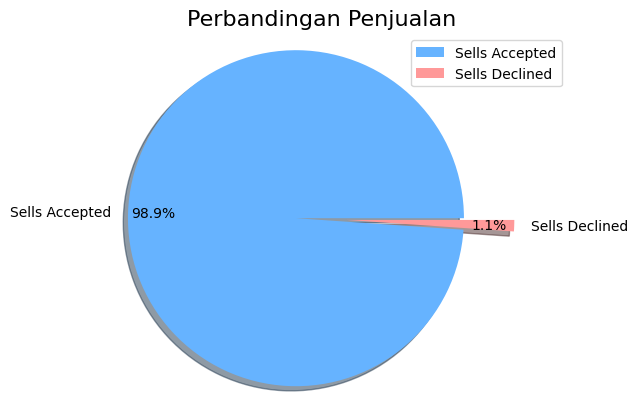

In [28]:
sizes = [Acc_Uniqe_ID, NotAcc_Uniqe_ID]
labels = 'Sells Accepted', 'Sells Declined'
colors = ['#66b3ff', '#ff9999']  
explode = (0.1, 0.2)  

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, 
                                   explode=explode, shadow=True, startangle=0,
                                   pctdistance=0.85, wedgeprops={'width': 1}) 

ax.set_title('Perbandingan Penjualan', fontsize=16)

ax.axis('equal') 

ax.legend(loc='best', labels=labels)

plt.show()


### 2. Bagaimana penggunaan kartu kredit di daerah dengan penjualan terbanyak dibandingkan dengan jenis pembayaran lainnya?

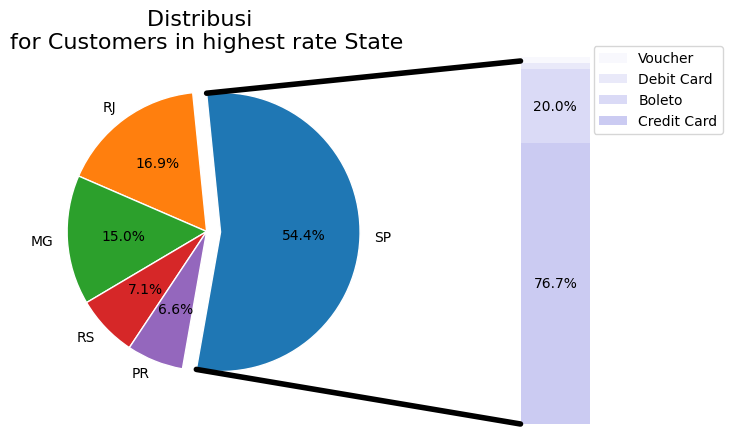

In [29]:
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)
data = Acc_AllData.groupby("customer_state")["order_id"].count().sort_values(ascending=False).head(5)
data_SP = Acc_AllData[(Acc_AllData['customer_state'] == 'SP') & (Acc_AllData['payment_sequential'] == 1)] \
    .groupby(["customer_state", "payment_type"])["order_id"].count().sort_values(ascending=False)

explode = explode = [0.1 if i == 0 else 0 for i in range(len(data))]

# pie chart parameters
overall_ratios = data.values
labels = data.index.get_level_values('customer_state')

# rotate so that first wedge is split by the x-axis
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=260,
                     labels=labels, explode=explode, wedgeprops=dict(edgecolor='white') ,textprops={'fontsize': 10})

# bar chart parameters
age_ratios = data_SP.values / data_SP.sum() * 100
age_labels = data_SP.index.get_level_values('payment_type')
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, label=label, color='#c2c2f0',
                alpha=0.1 + 0.25 * j)
    if height > 15:
        ax2.bar_label(bc, labels=[f"{height:1.1f}%"], label_type='center')

ax1.set_title('Distribusi  \nfor Customers in highest rate State', fontsize=16)
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = 100

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bottom), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

Didapati asal daerah customer terbanyak adalah SP, setelah itu melakukan data visualisasi pada tipe pembayaran

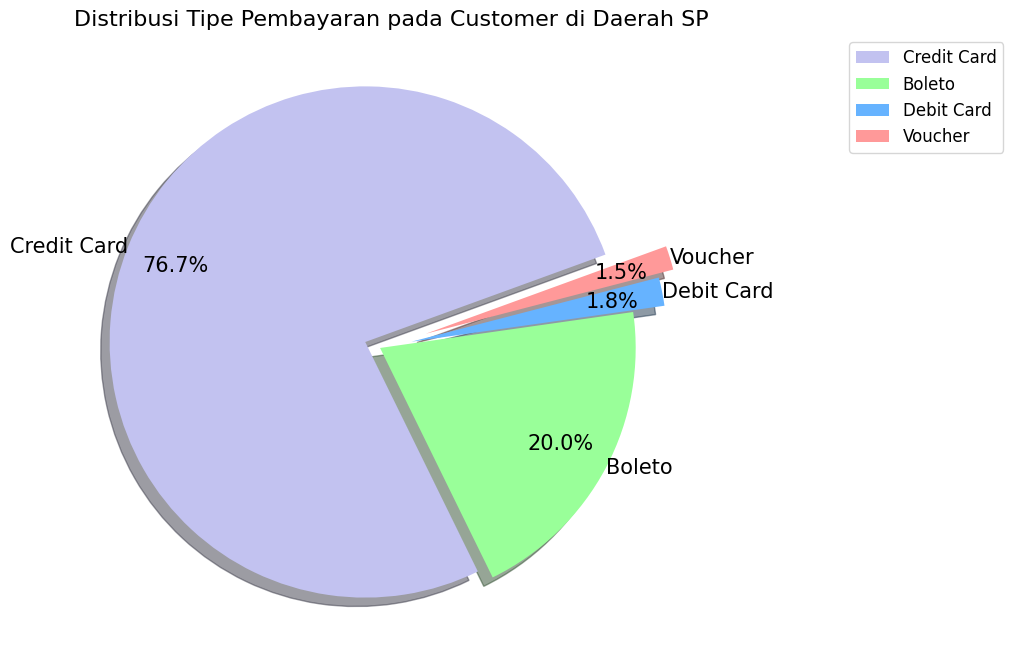

In [30]:
# Your data
data_SP = Acc_AllData[(Acc_AllData['customer_state'] == 'SP') & (Acc_AllData['payment_sequential'] == 1)] \
    .groupby(["customer_state", "payment_type"])["order_id"].count().sort_values(ascending=False)

# Extract payment types and their counts
counts = data_SP.values

# Custom colors for the slices
colors = ['#c2c2f0', '#99ff99', '#66b3ff', '#ff9999']
labels = data_SP.index.get_level_values('payment_type')
# Explode values to separate slices
explode = (0.05, 0, 0.1, 0.15)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(counts,radius=0.8,labeldistance=1, pctdistance=0.8, labels=labels,
    autopct='%1.1f%%', explode=explode, startangle=20, colors=colors, shadow=True, textprops={'fontsize': 15})

# Add a title with a larger font size
plt.title('Distribusi Tipe Pembayaran pada Customer di Daerah SP', fontsize=16)

# Add a legend with custom colors
plt.legend(labels=labels, loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1), prop={'size': 12})

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

### 3. Apakah distribusi hasil penjualan dari daerah penjual dengan dengan daerah pelanggan yang membeli berbeda secara signifikan dari distribusi normal?

In [31]:
grouped_data = Acc_AllData.drop_duplicates(subset=['order_id'], keep='first').groupby("seller_state")["seller_state"].count().reset_index(name='count_sell').sort_values(by='count_sell', ascending=False)

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data)

# Concatenate grouped data to Acc_AllData
data_comb1 = pd.concat([grouped_df], ignore_index=True)

In [32]:
grouped_data = Acc_AllData.drop_duplicates(subset=['order_id'], keep='first').groupby(["customer_state"])["customer_state"].count().reset_index(name='count_cust').sort_values(by='count_cust', ascending=False)

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data)

# Concatenate grouped data to Acc_AllData
data_comb2 = pd.concat([grouped_df], ignore_index=True)

In [33]:
data_comb = pd.merge(left=data_comb2, right=data_comb1, how="outer", left_on="customer_state", right_on="seller_state")

# Change the column name at index 0
data_comb.rename(columns={'customer_state': 'State'}, inplace=True)

# Remove the column at index 2
data_comb = data_comb.drop(columns=['seller_state'], axis=1).fillna(0)

In [34]:
# Normalisasi Data
def minmax_scaler(df, columns):

  scaled_df = pd.DataFrame()
  for column in columns:
    min_value = df[column].min()
    max_value = df[column].max()
    scaled_column = (df[column] - min_value) / (max_value - min_value)
    scaled_df[column] = scaled_column
  return scaled_df

In [35]:
data_comb[['count_cust', 'count_sell']] = minmax_scaler(data_comb, ['count_cust', 'count_sell'])

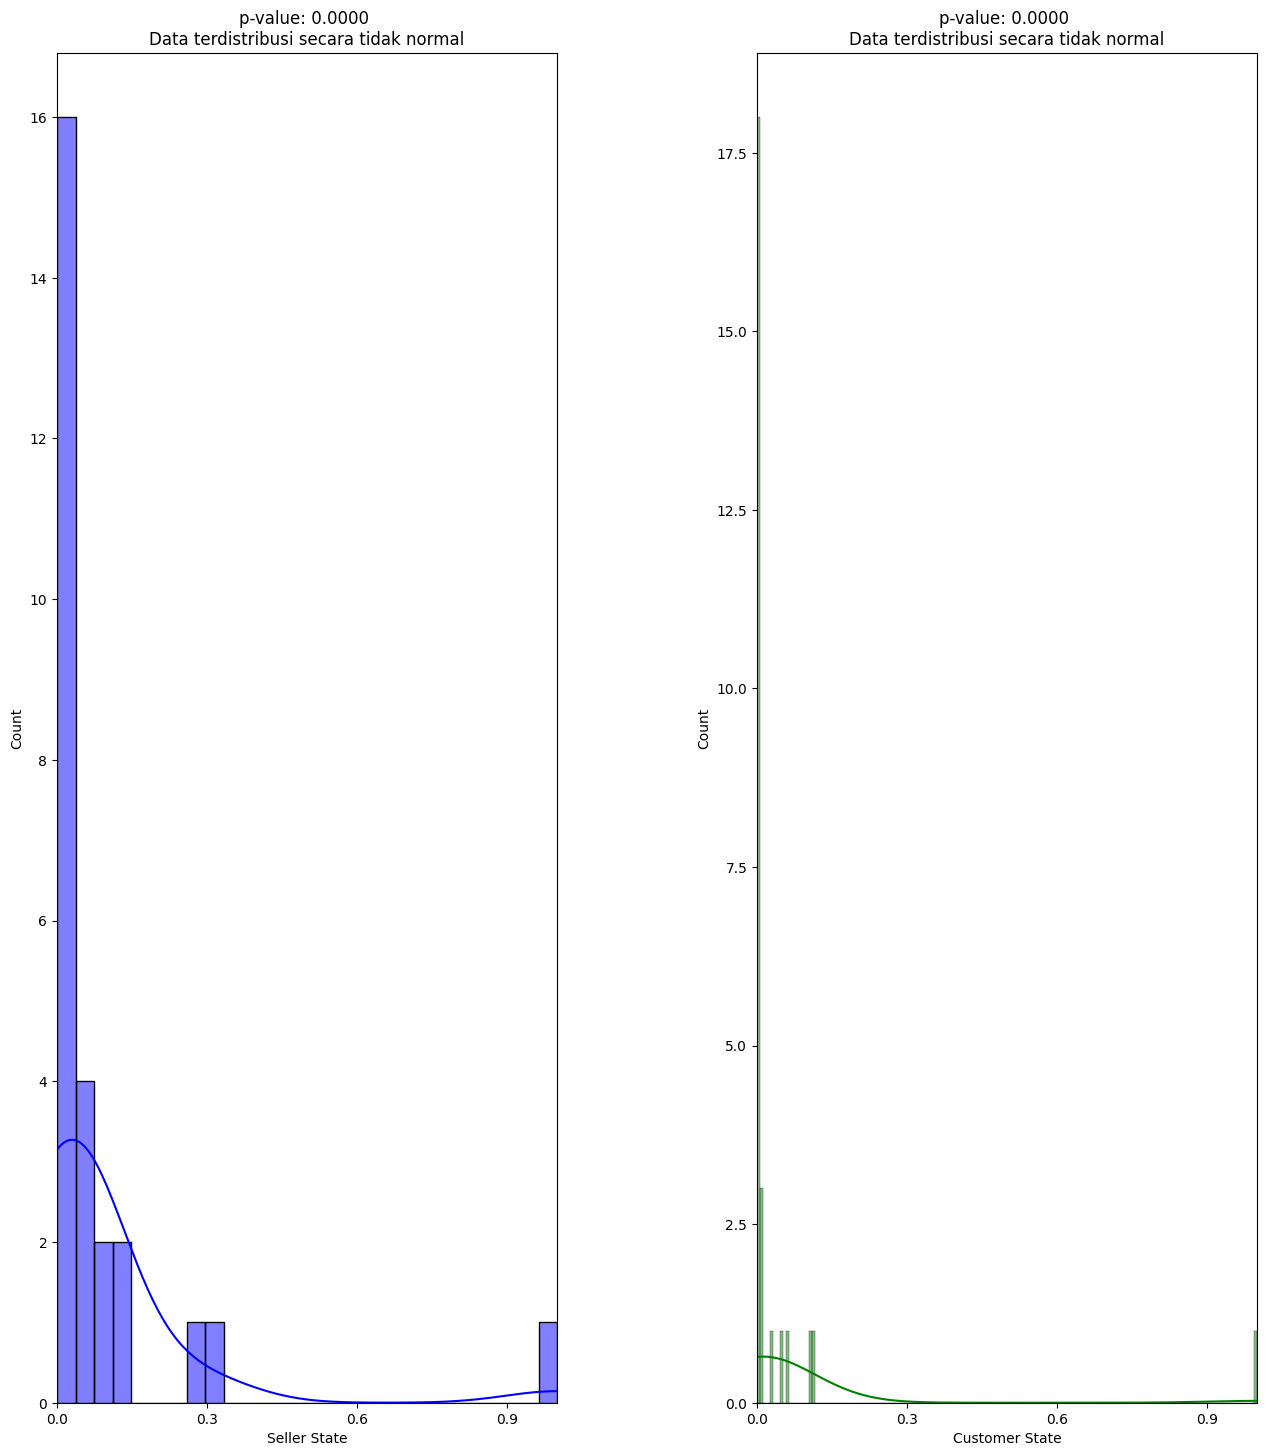

In [36]:
# Membuat Array Data yang Digunakan
data_frames = [data_comb]

# Set alpha
alpha = 0.05

# String Komentar Data
normal = 'Data terdistribusi secara normal '
notnormal = 'Data terdistribusi secara tidak normal'

# Loop Start
for i, df in enumerate(data_frames):
    f, axes = plt.subplots(1, 2, figsize=(15, 15))
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=1, wspace=0.4, hspace=0.4)

    # Histogram
    # Seller State
    seller_state = sns.histplot(df.iloc[:, 1], ax=axes[0], kde=True, color='blue')
    seller_state.set(xlim=(0.0, 1.0))
    seller_state.set_xticks(np.arange(0.0, 1.1, 0.3))
    seller_state.set_xlabel('Seller State')
    stat, p_value = shapiro(df.iloc[:, 1])
    if p_value > alpha:
        seller_state.set_title(f'p-value: {p_value:.4f} \n' + normal)
    else:
        seller_state.set_title(f'p-value: {p_value:.4f} \n' + notnormal)

    # Customer State
    customer_state = sns.histplot(df.iloc[:, 2], ax=axes[1], kde=True, color='green')
    customer_state.set_xlabel('Customer State')
    customer_state.set(xlim=seller_state.get_xlim())
    customer_state.set_xticks(seller_state.get_xticks())
    stat, p_value = shapiro(df.iloc[:, 2])
    if p_value > alpha:
        customer_state.set_title(f'p-value: {p_value:.4f} \n' + normal)
    else:
        customer_state.set_title(f'p-value: {p_value:.4f} \n' + notnormal)


### 4. Bagaimana pengaruh daerah seller dengan daerah customer ?

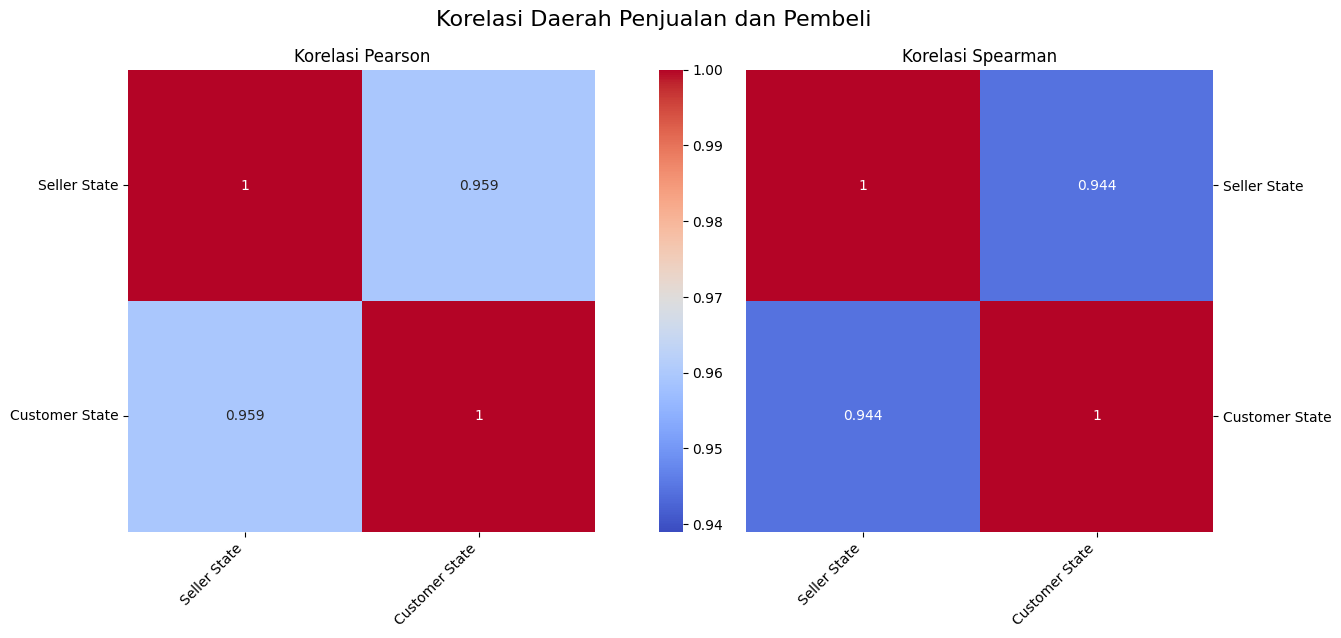

In [37]:
# Membuat Array Data yang Digunakan
data_frames = [data_comb]

# Membuat Array untuk Xbar Variable dan Ybar Variable
column_labels = ['Seller State', 'Customer State']

# Loop Start
for i, df in enumerate(data_frames):
    # Membuat subplots
    f, axes = plt.subplots(1, 3, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 0.05, 1]})

    # Pearson correlation
    correlation_pearson = df.iloc[:,1:].corr(method='pearson')
    pearson_heatmap = sns.heatmap(correlation_pearson,
                                  cmap='coolwarm',
                                  annot=True,
                                  fmt='.3g',
                                  ax=axes[0],
                                  vmax=1,
                                  vmin=0.939,
                                  cbar=False)
    pearson_heatmap.set_title("Korelasi Pearson")
    pearson_heatmap.set_xticklabels(column_labels, rotation=45, ha='right')
    pearson_heatmap.set_yticklabels(column_labels, rotation=0)

    # Spearman correlation
    correlation_spearman = df.iloc[:,1:].corr(method='spearman')
    sns.heatmap(correlation_spearman,
                cmap='coolwarm',
                annot=True,
                fmt='.3g',
                ax=axes[2],
                vmin=0.939,
                vmax=1,
                cbar=True,
                cbar_ax=axes[1])
    axes[2].set_title("Korelasi Spearman")
    axes[2].set_xticklabels(column_labels, rotation=45, ha='right')
    axes[2].set_yticklabels(column_labels, rotation=0)
    axes[2].yaxis.tick_right()
    axes[2].yaxis.set_label_position('right')

    # Set Title
    plt.suptitle("Korelasi Daerah Penjualan dan Pembeli", fontsize=16)

    # Display
    plt.show()
# Loop End

### 5. Bagaimana tren penjualan untuk kategori produk dengan penjualan diatas 300?

In [38]:
ACC_data2019 = Acc_AllData[(Acc_AllData['order_purchase_timestamp'].dt.year == 2018)].drop_duplicates(subset=['order_id','product_category_name_english'], keep='first')

In [39]:
ACC_data2019.rename(columns={'order_purchase_timestamp': 'Purchase Timestamp'}, inplace=True)
ACC_data2019.rename(columns={'product_category_name_english': 'Product Category'}, inplace=True)
grouped = ACC_data2019.groupby([ACC_data2019['Purchase Timestamp'].dt.month,'Product Category']).count()

In [40]:
# Define a dictionary to map month numbers to month names
month_map = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Map month numbers to month names in the MultiIndex level and assign it back to the DataFrame
new_index = grouped.index.set_levels(grouped.index.levels[0].map(month_map), level=0)

# Update the MultiIndex of the DataFrame
grouped.set_index(new_index, inplace=True)

grouped.rename(columns={'order_purchase_timestamp': 'Purchase Timestamp'}, inplace=True)
grouped.rename(columns={'product_category_name_english': 'Product Category'}, inplace=True)

# Print the updated DataFrame
grouped = grouped['order_id'].reset_index(name='Count').set_index(['Purchase Timestamp', 'Product Category'])
grouped

Count
Purchase Timestamp Product Category                              
January            agro_industry_and_commerce                  15
                   air_conditioning                            22
                   art                                         19
                   audio                                       25
                   auto                                       243
...                                                           ...
August             stationery                                 159
                   telephony                                  242
                   toys                                       151
                   watches_gifts                              391
September          kitchen_dining_laundry_garden_furniture      1

[518 rows x 1 columns]

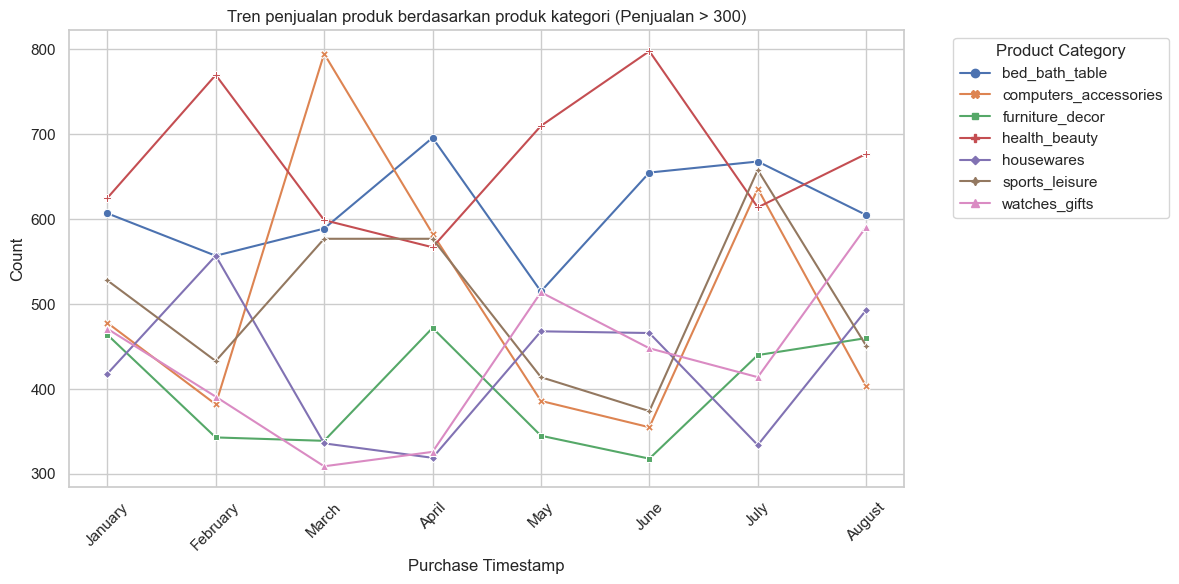

In [41]:
df_reset = grouped.reset_index()

# Filter rows where count is more than 300
filtered_df = df_reset[df_reset['Count'] > 300]

# Filter months from January to May
months_to_include = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
filtered_df = filtered_df[filtered_df['Purchase Timestamp'].isin(months_to_include)]

# Get product categories that had sales in each month
product_categories_to_include = filtered_df.groupby('Product Category').filter(lambda x: len(x) == len(months_to_include))['Product Category'].unique()

# Filter the DataFrame to include only selected product categories
filtered_df = filtered_df[filtered_df['Product Category'].isin(product_categories_to_include)]

# Pivot the filtered DataFrame to create the appropriate format for the line graph
pivot_df = filtered_df.pivot_table(index='Purchase Timestamp', columns='Product Category', values='Count', aggfunc='sum')

# Set a seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plotting the line graph with seaborn settings and custom x-axis order
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_df, markers=True, dashes=False, hue_order=product_categories_to_include)
plt.xlabel('Purchase Timestamp')
plt.ylabel('Count')
plt.title('Tren penjualan produk berdasarkan produk kategori (Penjualan > 300)')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.xticks(ticks=range(len(months_to_include)), labels=months_to_include)  # Setting custom x-axis order
plt.tight_layout()
plt.show()

### 6. Dimanakah lokasi geografis dari tiap customer yang mendaftar ?

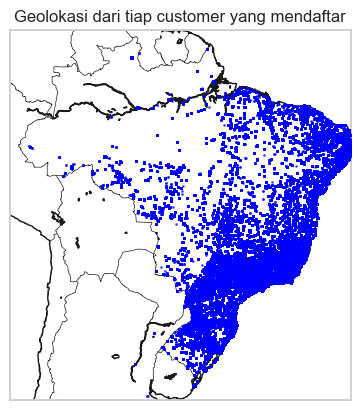

<Figure size 5300x5000 with 0 Axes>

In [42]:
# Create a Basemap of Brazil
map = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=6, llcrnrlon=-75, urcrnrlon=-35, resolution='i')

# Create a scatter plot of customer geolocation data with smaller dots
x, y = map(location['geolocation_lng'].values, location['geolocation_lat'].values)
map.scatter(x, y, marker='o', color='blue', alpha=0.6, zorder=5, s=1)  # Adjust the 's' parameter for smaller dots

# Draw coastlines and country boundaries
map.drawcoastlines()
map.drawcountries()

# Add labels
plt.title('Geolokasi dari tiap customer yang mendaftar')

# Adjust figure size
plt.figure(figsize=(12, 9)) # Adjust the figure size as needed

plt.show()

## Conclusion

1. Apakah ada perbedaan signifikan antara penjualan barang yang telah dikonfirmasi dengan barang yang belum dikonfirmasi? 

Berdasarkan visualisasi data didapati 98,9% data penjualan yang diterima sedangkan 1,1% penjualan tidak diterima/ditolak. Terdapat perbedaan yang signifikan dan menunjukkan bahwa penjualan pada E-Commerce lebih ke arah positive

2. Bagaimana penggunaan kartu kredit di daerah dengan penjualan terbanyak dibandingkan dengan jenis pembayaran lainnya?

Berdasarkan visualisasi data didapati bahwa daerah SP adalah daerah paling banyak terjadi transaksi pada E-Commerce dengan tingkat pembayaran kartu kredit paling tinggi, sebanyak 76,7% dibandingkan dengan boleto 20,0% diikuti dengan kartu debit 1,8% dan penggunaan paling sedikit Voucher yang hanya 1,5%

3. Apakah distribusi hasil penjualan dari daerah penjual dengan dengan daerah pelanggan yang membeli berbeda secara signifikan dari distribusi normal?

Berdasarkan visualisasi data distribusi normal dapat dibuktikan dengan bentuk, biasanya dibuktikan oleh adanya grafik simetris yang disebut kurva lonceng, sedangkan kedua grafik tidak terdapat grafik simetris yang disebut kurva lonceng, dan diperkuat dengan metode saphiro dengan melihat hasil dari p-value

4. Bagaimana pengaruh dari daerah seller dengan dari daerah customer ?

Berdasarkan visualisasi data menggunakan heatmap, dapat dilihat dengan metode korelasi Pearson dan korelasi spearman. Sehingga dengan nilai lebih dari 0,9 dapat disimpulkan bahwa daerah seller/penjual juga berpengaruh pada daerah customer yang akan berbelanja pada E-Commerce 

5. Bagaimana tren penjualan untuk kategori produk dengan penjualan diatas 300?

Berdasarkan visualisasi data, didapati health_beauty memiliki grafik garis cukup stabil, untuk computers_accessories sempat menjadi puncak trend penjualan pada bulan maret secara tiba tiba

6. Dimanakah lokasi geografis dari tiap customer yang mendaftar ?

Berdasatkan visualisasi data, customer yang mendaftar kebanyakan berada di bagian tenggara

In [43]:
Acc_AllData.to_csv("./dataset/Acc_AllData.csv", index=False)
NotAcc_AllData.to_csv("./dataset/NotAcc_AllData.csv", index=False)
location.to_csv("./dataset/location.csv", index=False)